In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
np.random.seed(7)

#for interactive plots
%matplotlib inline
import mpld3
mpld3.enable_notebook()



In [206]:
#importing data
df = pd.read_csv('Google2004-2017April11.csv')
df.set_index('Date',inplace=True)

In [207]:
df.head()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,100.000168,104.060182,95.960165,100.340176,44871300,50.119968
2004-08-20,101.010175,109.080187,100.500174,108.310183,22942800,54.100990
2004-08-23,110.750191,113.480193,109.050183,109.400185,18342800,54.645447
2004-08-24,111.240189,111.600192,103.570177,104.870176,15319700,52.382705
2004-08-25,104.960181,108.000187,103.880180,106.000184,9232100,52.947145


Dataset contains stock price of Google from 2004 Aug 19 till 2017 Apr 11

In [208]:
#extracting the close price
dataset = df.Close
dataset = dataset.reset_index(drop=True)
dataset = pd.DataFrame(dataset)

In [209]:
dataset.head(5)

,Close
0,100.340176
1,108.310183
2,109.400185
3,104.870176
4,106.000184


In [210]:
#Summary statistics of the data
dataset.describe()

,Close
count,3184.000000
mean,560.402579
std,198.763233
min,100.010169
25%,447.133269
50%,545.205933
75%,669.626146
max,1220.172036


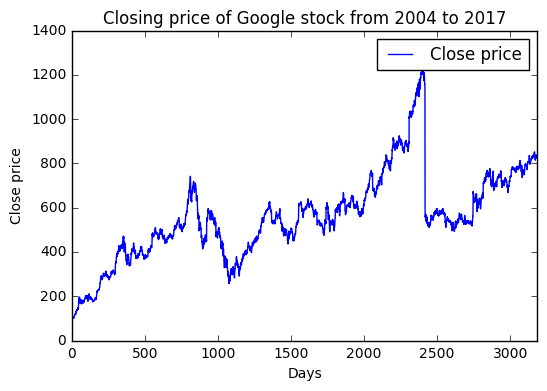

In [211]:
#visualization of the dataset

dataset.Close.plot(label='Close price')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.title('Closing price of Google stock from 2004 to 2017')
plt.legend()

In [212]:
#converting df into an array with float32 as datatype
dataset = dataset.values
dataset = dataset.astype('float32')

In [213]:
#normalizing dataset using MinMaxScaler from sklearn
scaler = MinMaxScaler(feature_range=(0,1))
values = dataset
dataset = scaler.fit_transform(values)

In [214]:
dataset

array([[  2.94610858e-04],
       [  7.40965456e-03],
       [  8.38273019e-03],
       ..., 
       [  6.46924138e-01],
       [  6.46977782e-01],
       [  6.45745754e-01]], dtype=float32)

In [215]:
#defining training_size, test_size(test_size1) and 
#test_size(2) for checking the model's performance
train_size = int(len(dataset)*0.7)
test_size1 = int(len(dataset)*0.20)
test_size2 = int(len(dataset)*0.10)

print train_size,test_size1,test_size2

2228 636 318


In [216]:
#train consists of data from 2004-08-19 to 2013-06-25

#test1 consists of data from 2013-06-26 to 2016-01-05

#test2 consists of data from 2016-01-06 to 2017-04-11

train,test1,test2 = dataset[0:train_size,:],dataset[train_size:train_size+test_size1,:],dataset[train_size+test_size1:len(dataset),:]

### visualising train,test1 and test2 data

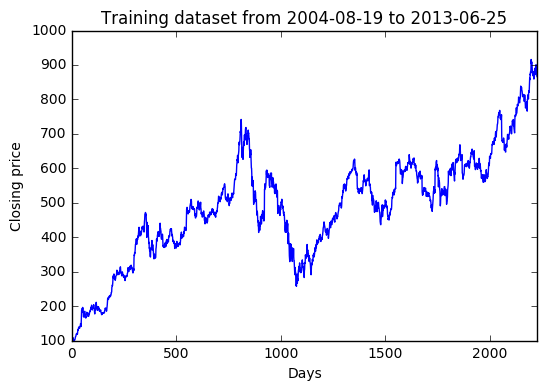

In [217]:
dm =  pd.read_csv('Google2004-2017April11.csv')
dm = dm.Close
dm = dm[0:2228]
dm.plot()
plt.title('Training dataset from 2004-08-19 to 2013-06-25')
plt.xlabel('Days')
plt.ylabel('Closing price')

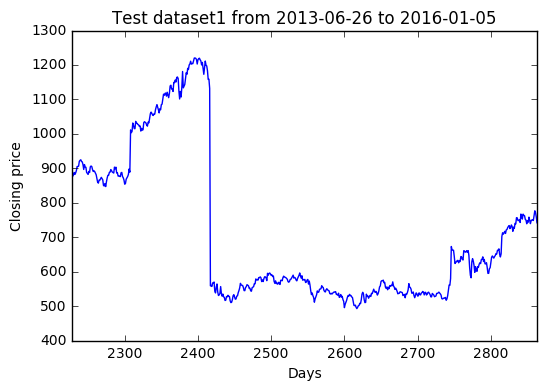

In [218]:
dm =  pd.read_csv('Google2004-2017April11.csv')
dm = dm.Close
dm = dm[2228:2228+636]
dm.plot()
plt.title('Test dataset1 from 2013-06-26 to 2016-01-05')
plt.xlabel('Days')
plt.ylabel('Closing price')

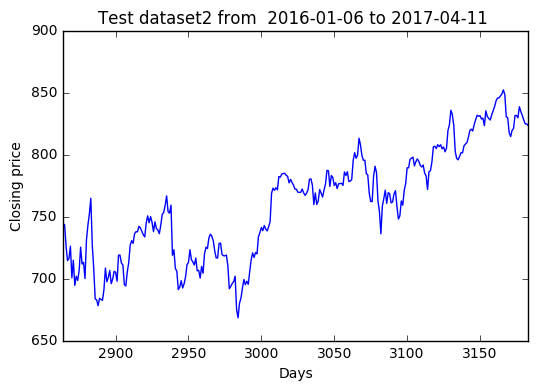

In [219]:
df =  pd.read_csv('Google2004-2017April11.csv')
df = df.Close
df = df[2228+636:]
df.plot()
plt.title('Test dataset2 from  2016-01-06 to 2017-04-11 ')
plt.xlabel('Days')
plt.ylabel('Closing price')


In [220]:
print train.shape
print test1.shape
print test2.shape

(2228, 1)
(636, 1)
(320, 1)


In [221]:
#function to create features and target variables for 
#feeding LSTM network

def create_dataset(dataset,look_back=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX),np.array(dataY)

In [222]:
look_back = 1
trainX,trainY = create_dataset(train,look_back)
testX1,testY1 = create_dataset(test1,look_back)
testX2,testY2 = create_dataset(test2,look_back)

print trainX.shape
print testX1.shape
print testX2.shape

(2226, 1)
(634, 1)
(318, 1)


In [223]:
#reshaping train and test array to match the informat of
#LSTM network ie [samples,timesteps,features]
#here timestep = 1
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX1 = np.reshape(testX1,(testX1.shape[0],1,testX1.shape[1]))
testX2 = np.reshape(testX2,(testX2.shape[0],1,testX2.shape[1]))

In [224]:
print trainX.shape
print testX1.shape
print testX2.shape

(2226, 1, 1)
(634, 1, 1)
(318, 1, 1)


In [225]:
#defining and training the LSTM network with 4 LSTM
#neurons within a single hidden layer and 
#sigmoid function as an activation function with
#100 epochs and 1 batch

#hyper parameters for this model are:
#Epochs
#batch_size
#Number of LSTM neurons

model = Sequential()
model.add(LSTM(5,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss ='mean_squared_error',optimizer = 'adam')
model.fit(trainX,trainY,epochs=10,batch_size=1,verbose=2)


Epoch 1/10
5s - loss: 0.0097
Epoch 2/10
5s - loss: 1.2570e-04
Epoch 3/10
5s - loss: 1.0838e-04
Epoch 4/10
4s - loss: 9.5848e-05
Epoch 5/10
4s - loss: 9.0056e-05
Epoch 6/10
4s - loss: 8.9468e-05
Epoch 7/10
4s - loss: 8.7787e-05
Epoch 8/10
4s - loss: 8.7142e-05
Epoch 9/10
4s - loss: 8.8629e-05
Epoch 10/10
4s - loss: 8.9047e-05


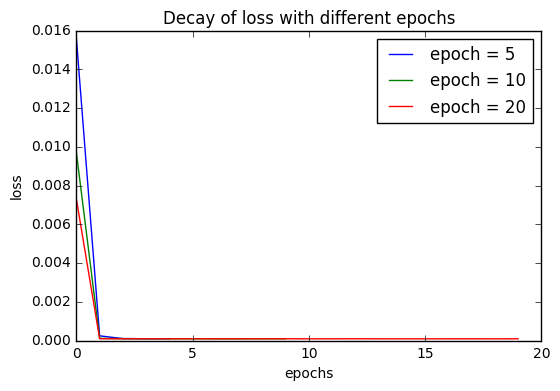

In [226]:
#ploting model loss vs number of epochs

#with epochs = 5
loss5 = [0.0156,2.3941e-04,9.8310e-05,9.1728e-05,9.3908e-05]
epochs5 = list(range(5))

#with epochs = 10
loss10 = [0.0097,1.1118e-04,9.7911e-05,9.0979e-05,9.1802e-05,9.1412e-05,8.7551e-05,8.7413e-05,9.0782e-05,9.0578e-05]
epochs10 = list(range(10))

#with epochs = 20
loss20 = [0.0073,9.1555e-05,8.6991e-05,8.9457e-05,8.6574e-05,8.8296e-05,8.6800e-05,8.6620e-05,8.8464e-05,8.9131e-05,8.6933e-05,8.7573e-05,8.8812e-05,8.7587e-05,8.6598e-05,8.6978e-05,8.7839e-05,8.8129e-05,8.6483e-05,8.8371e-05]
epochs20 = list(range(20))


plt.plot(epochs5,loss5,label= 'epoch = 5')
plt.plot(epochs10,loss10,label= 'epoch = 10')
plt.plot(epochs20,loss20,label= 'epoch = 20')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Decay of loss with different epochs')
plt.legend()

As we can see from the graph that loss function becomes almost equal to zero after epochs= 1,Since loss value doesn't change with the increase in epochs,we can choose any epochs > 3,I'll be choosing epochs = 10.

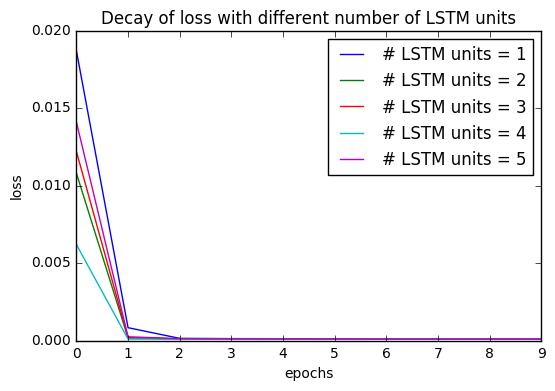

In [227]:
#Now let's see how number of LSTM units affects the model's performance

#with # LSTM units = 1
loss1 = [0.0187,8.2655e-04,1.3708e-04,1.2172e-04,1.1636e-04,1.1396e-04,1.1139e-04,1.1005e-04,1.1082e-04,1.0868e-04 ]
epochs1 = list(range(10))

#with # LSTM units = 2
loss2 = [0.0108,1.6785e-04,1.0232e-04,9.2564e-05,8.8163e-05,8.8617e-05,9.0384e-05,8.6299e-05,9.0699e-05,8.6716e-05 ]
epochs2 = list(range(10))

#with # LSTM units = 3
loss3 = [0.0122,1.8712e-04,1.0046e-04,8.9069e-05,9.0376e-05,8.8180e-05,8.8200e-05,8.9986e-05,9.0043e-05,8.8624e-05 ]
epochs3 = list(range(10))

#with # LSTM units = 4
loss4 = [ 0.0062,9.1945e-05,8.8416e-05,8.6701e-05,8.9476e-05,8.5041e-05,8.6777e-05,8.9734e-05,8.6746e-05,8.8320e-05 ]
epochs4 = list(range(10))

#with # LSTM units = 5
loss5 = [0.0141,2.3985e-04,1.2132e-04,1.0327e-04,9.6518e-05,9.2004e-05,8.9052e-05,9.1468e-05,8.7928e-05,8.7445e-05 ]
epochs5 = list(range(10))

plt.plot(epochs1,loss1,label= '# LSTM units = 1')
plt.plot(epochs2,loss2,label= '# LSTM units = 2')
plt.plot(epochs3,loss3,label= '# LSTM units = 3')
plt.plot(epochs4,loss4,label= '# LSTM units = 4')
plt.plot(epochs5,loss5,label= '# LSTM units = 5')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Decay of loss with different number of LSTM units')
plt.legend()




As we can see from the graph that all LSTM unit's losses are almost equal to zero after 2 epochs.So I'll be choosing 5 LSTM units.

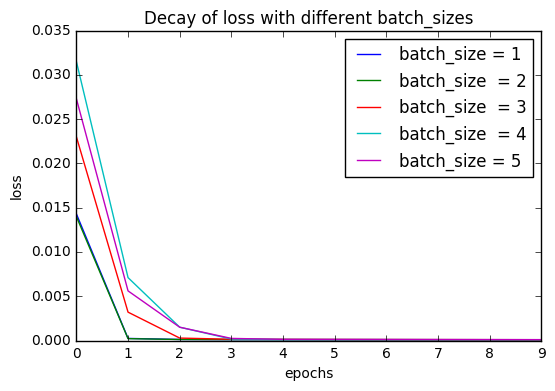

In [228]:
#Now let's see how batch_size affects the model's performance

#with batch_size = 1
loss1 = [0.0143,2.3370e-04,1.1637e-04,9.8713e-05,9.2880e-05,8.9666e-05,8.8963e-05,8.8404e-05,8.7628e-05,9.0264e-05 ]
epochs1 = list(range(10))

#with  batch_size = 2
loss2 = [0.0140, 2.0908e-04, 1.1438e-04,1.0183e-04,9.4115e-05,8.8455e-05,8.4526e-05,8.4377e-05,8.5305e-05,8.4121e-05 ]
epochs2 = list(range(10))

#with batch_size = 3
loss3 = [0.0230,0.0032,2.7427e-04,1.4116e-04,1.3339e-04,1.2306e-04,1.1266e-04,1.0309e-04,9.5669e-05,8.9377e-05 ]
epochs3 = list(range(10))

#with batch_size = 4
loss4 = [0.0315,0.0071,0.0015,1.6500e-04,1.1679e-04,1.1088e-04,1.0637e-04,9.8707e-05,9.4120e-05,9.0534e-05  ]
epochs4 = list(range(10))

#with batch_size = 5
loss5 = [0.0273,0.0056,0.0015,2.3546e-04,1.2844e-04,1.2186e-04,1.1622e-04,1.1007e-04,1.0429e-04,9.7430e-05 ]
epochs5 = list(range(10))

plt.plot(epochs1,loss1,label= 'batch_size = 1')
plt.plot(epochs2,loss2,label= 'batch_size  = 2')
plt.plot(epochs3,loss3,label= 'batch_size  = 3')
plt.plot(epochs4,loss4,label= 'batch_size  = 4')
plt.plot(epochs5,loss5,label= 'batch_size = 5')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Decay of loss with different batch_sizes')
plt.legend()

As we can see from the graph that as batche_size increases the model is taking more epochs to converge loss value to zero.So I'd be using a batch_size = 1 , since it's loss value becomes almost zero within 2 epochs.

In [229]:
trainPredict = model.predict(trainX)
testPredict1 = model.predict(testX1)
testPredict2 = model.predict(testX2)


trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict1 = scaler.inverse_transform(testPredict1)
testY1 = scaler.inverse_transform([testY1])

testPredict2 = scaler.inverse_transform(testPredict2)
testY2 = scaler.inverse_transform([testY2])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore1 = math.sqrt(mean_squared_error(testY1[0], testPredict1[:,0]))
print('Test Score1: %.2f RMSE' % (testScore1))


testScore2 = math.sqrt(mean_squared_error(testY2[0], testPredict2[:,0]))
print('Test Score2: %.2f RMSE' % (testScore2))

Train Score: 10.82 RMSE
Test Score1: 27.25 RMSE
Test Score2: 8.84 RMSE


As we can see the root mean square values of Train, test1 and test2.The reason for test1 score to be higher than any other score is that, within the range of samples that test1 contains there is sudden increase in the stock price in the year 2013, I think the model has approximated the increase in stock price and the difference between this approximated value and actual value might have contributed to increase in test1 score.

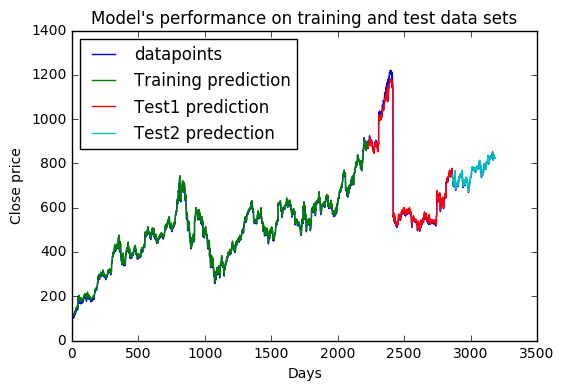

In [230]:















# train predictions plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:]=trainPredict  
a = len(trainPredict) + look_back+2

#test predictions plotting
testPredictPlot1 = np.empty_like(dataset)
testPredictPlot1[:,:] = np.nan
#testPredictPlot1[train_size-2:train_size-2+test_size1-2,:]=testPredict1
testPredictPlot1[a:a+test1.shape[0]-2*look_back,:]=testPredict1
c = a+test1.shape[0]-2

#test predictions plotting
testPredictPlot2 = np.empty_like(dataset)
testPredictPlot2[:,:] = np.nan
testPredictPlot2[c+2:c+2+testPredict2.shape[0],:]=testPredict2


#plot baseline and predictions
%matplotlib inline
plt.plot(scaler.inverse_transform(dataset),label = 'datapoints')
plt.plot(trainPredictPlot,label = 'Training prediction')
plt.plot(testPredictPlot1,label = 'Test1 prediction')

plt.plot(testPredictPlot2,label = 'Test2 predection')
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plt.legend(loc = 'upper left')
plt.title("Model's performance on training and test data sets")
plt.xlabel('Days')
plt.ylabel('Close price')